# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
''' ------------------------------------------'''
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", mpl.__version__)
print("seaborn version:", sns.__version__)

Pandas version: 1.5.3
NumPy version: 1.23.5
Matplotlib version: 3.7.0
seaborn version: 0.12.2


# Reading The dataset:

In [2]:
# Read the Iris dataset file
data = pd.read_csv('C:\\Users\\Tushar srivastava\\Downloads\\tested.csv')
print("Done")
#C:\Users\Tushar srivastava\Downloads\tested.csv

Done


# Exploring the dataset:

In [3]:
# dataset columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# drop some columns :
data = data.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
print (data.head())

   Survived  Pclass     Sex   Age     Fare Embarked
0         0       3    male  34.5   7.8292        Q
1         1       3  female  47.0   7.0000        S
2         0       2    male  62.0   9.6875        Q
3         0       3    male  27.0   8.6625        S
4         1       3  female  22.0  12.2875        S


In [6]:
# print columns after edit:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [7]:
data.describe()

,Survived,Pclass,Age,Fare
count,418.000000,418.000000,332.000000,417.000000
mean,0.363636,2.265550,30.272590,35.627188
std,0.481622,0.841838,14.181209,55.907576
min,0.000000,1.000000,0.170000,0.000000
25%,0.000000,1.000000,21.000000,7.895800
50%,0.000000,3.000000,27.000000,14.454200
75%,1.000000,3.000000,39.000000,31.500000
max,1.000000,3.000000,76.000000,512.329200


In [8]:
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
Fare         1
Embarked     0
dtype: int64

#### In the previous table, it is evident that there are some missing data that need to be addressed and handled.

# **Cleaning the dataset:**

In [9]:
# printing the data type of each column in this dataset
print(data.dtypes)


Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object


The Fare column has 1 missing value, and I will replace him with data['Fare'].mean():

In [10]:
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
print ("The data['Fare'] missing val =\t",data["Fare"].isnull().sum())

The data['Fare'] missing val =	 0


### * Dealing with missing data in the 'Age' column:
* I will create a linear regression model to predict missing ages.

Lets see the data destribution in age column before predict the missing values and after predict the missing values.

<Axes: >

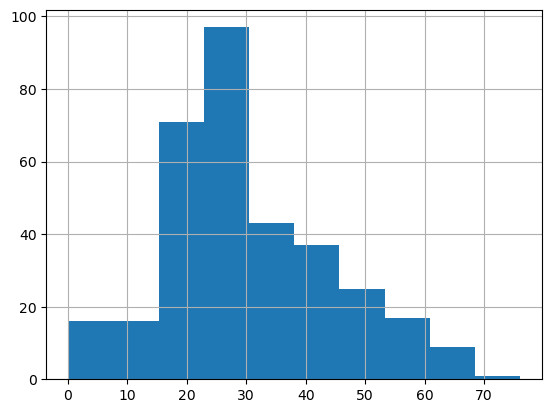

In [11]:
#before predict the missing values 
data['Age'].hist()

Now lets build the model to predict the missing values in the age column.

In [12]:
from sklearn.linear_model import LinearRegression

# Create a subset of the dataset with non-missing age values
age_df = data[['Survived', 'Pclass', 'Age', 'Fare']]  # Include relevant features

# Split into two subsets: one with missing ages and one without
known_age = age_df.loc[age_df['Age'].notna()]
unknown_age = age_df.loc[age_df['Age'].isna()]

# Create a linear regression model to predict missing ages
model = LinearRegression()
model.fit(known_age.drop('Age', axis=1), known_age['Age'])
predicted_age = model.predict(unknown_age.drop('Age', axis=1))

# Fill in the missing age values with the predicted values
data.loc[data['Age'].isna(), 'Age'] = predicted_age
print("done")

done


In [13]:
print ("The data['Age'] missing val =\t",data["Age"].isnull().sum())

The data['Age'] missing val =	 0


<Axes: >

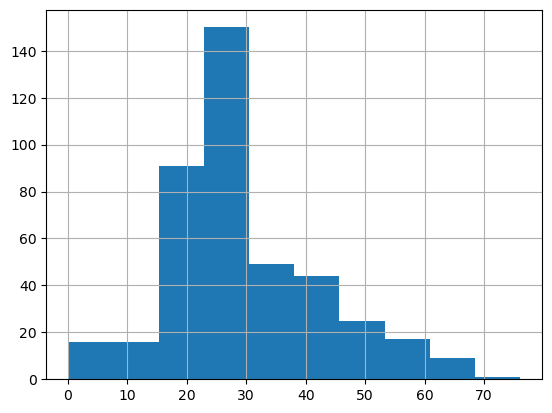

In [14]:
#After predict the missing values in data['Age']
data['Age'].hist()

## Wow incridable

In [15]:
print ("The total of missing values in each column:\n");data.isnull().sum()

The total of missing values in each column:



Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

# Explaining the dataset:

The Survived column indicates whether the passenger survived (value 1) or not (value 0) in the Titanic shipwreck.

In [7]:
# Calculate the average of "Survived"
survived_average = data["Survived"].mean()

# Print the average
print("Average of Survived:", survived_average)




Average of Survived: 0.36363636363636365


In [9]:


data['Sex_Encoded'] = data['Sex'].map({'male': 1, 'female': 2})

data[["Sex","Sex_Encoded"]].head(20)

,Sex,Sex_Encoded
0,male,1
1,female,2
2,male,1
3,male,1
4,female,2
5,male,1
6,female,2
7,male,1
8,female,2
9,male,1


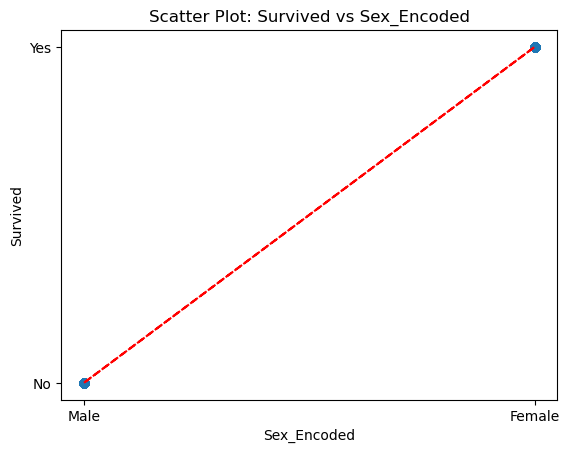

In [19]:

# Scatter plot
plt.scatter(data['Sex_Encoded'], data['Survived'])

# Trend line
z = np.polyfit(data['Sex_Encoded'], data['Survived'], 1)
p = np.poly1d(z)
plt.plot(data['Sex_Encoded'], p(data['Sex_Encoded']), "r--")

# Plot labels
plt.xlabel('Sex_Encoded')
plt.ylabel('Survived')

# Plot title
plt.title('Scatter Plot: Survived vs Sex_Encoded')
plt.yticks([0, 1], ['No', 'Yes'])
plt.xticks([1,2], ['Male', 'Female'])
# Show the plot
plt.show()


Number of Males: 266
Number of Females: 152
Number of Male Survivors: 0
Number of Female Survivors: 152


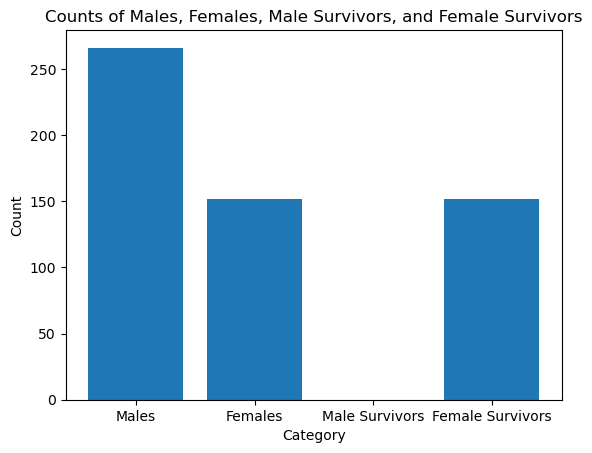

In [20]:
num_male = len(data[data['Sex'] == 'male'])
num_female = len(data[data['Sex'] == 'female'])

male_survivors = len(data[(data['Sex'] == 'male') & (data['Survived'] == 1)])
female_survivors = len(data[(data['Sex'] == 'female') & (data['Survived'] == 1)])

print("Number of Males:", num_male)
print("Number of Females:", num_female)
print("Number of Male Survivors:", male_survivors)
print("Number of Female Survivors:", female_survivors)


labels = ['Males', 'Females', 'Male Survivors', 'Female Survivors']
counts = [num_male, num_female, male_survivors, female_survivors]

# Plotting
plt.bar(labels, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Males, Females, Male Survivors, and Female Survivors')

# Display the plot
plt.show()

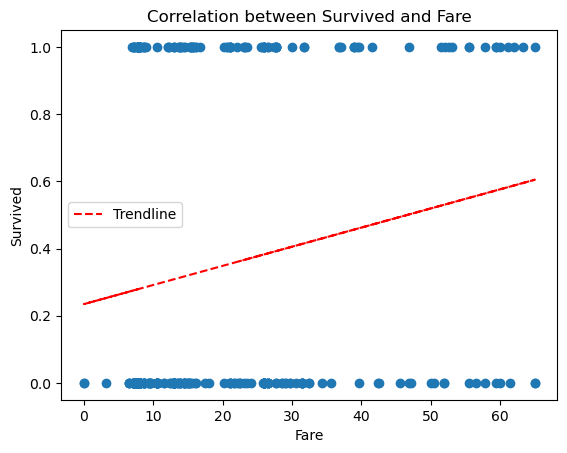

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the Fare column
cleaned_data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

# Print the cleaned dataset
#print(cleaned_data)


# Calculate the trendline
fit = np.polyfit(cleaned_data['Fare'], cleaned_data['Survived'], 1)
trendline = np.polyval(fit, cleaned_data['Fare'])

# Plot the scatter plot with trendline
plt.scatter(cleaned_data['Fare'], cleaned_data['Survived'])
plt.plot(cleaned_data['Fare'], trendline, color='red', linestyle='--', label='Trendline')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Fare')
plt.legend()
plt.show()


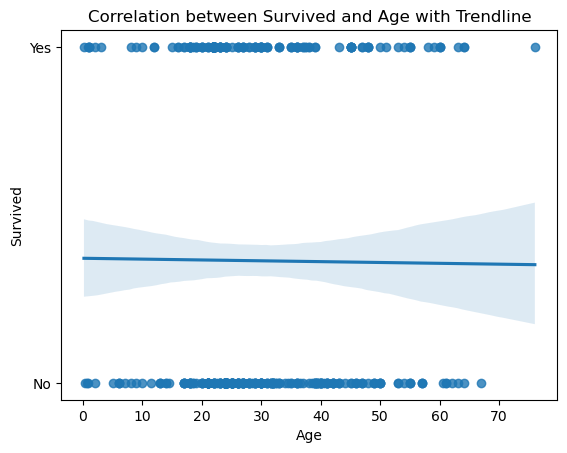

In [22]:

import seaborn as sns

# Assuming 'data' is your DataFrame containing the 'Survived' and 'Age' columns
sns.regplot(x='Age', y='Survived', data=data, scatter=True)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Age with Trendline')
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()